In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path ='/content/Online_Retail.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [5]:
df_cleaned= df[df['Quantity'] > 0]


In [6]:
df_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [7]:
df_cleaned.shape

(531285, 8)

In [8]:
df_cleaned.size

4250280

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


1) Clean the dataset look and study the dataset for this part

2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK. Create a bar chart for this

3)  Find Total Sale between two dates entered by user . show a line short for this

4) Find each Countries Total SALE to find which Countries is highest potential customer do a bar chat for this

5) Which Customer Id has highest purchase in quantity and total and find out the country of it

6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

7) Find the biggest order In Sale (Cost) which country was the order from and fiind total purchase (Cost) done by that customer ID

8) Find how many different customers are available for each country save the count in dictionary also return countries with highest and lowest customer count do bar chart for customer count

9) Find which stock code was ordered the most by each country

In [10]:
#1) Clean the dataset look and study the dataset for this part

df_cleaned= df[df['Quantity'] > 0]

In [11]:
#2) 2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK.
# Create a bar chart for this

country_qty = df_cleaned[df_cleaned['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum()
top_10_countries = country_qty.nlargest(10)
top_10_countries_dict = top_10_countries.to_dict()
top_10_countries_dict

{'Netherlands': 200937,
 'EIRE': 147447,
 'Germany': 119263,
 'France': 112104,
 'Australia': 84209,
 'Sweden': 36083,
 'Switzerland': 30630,
 'Spain': 27951,
 'Japan': 26016,
 'Belgium': 23237}

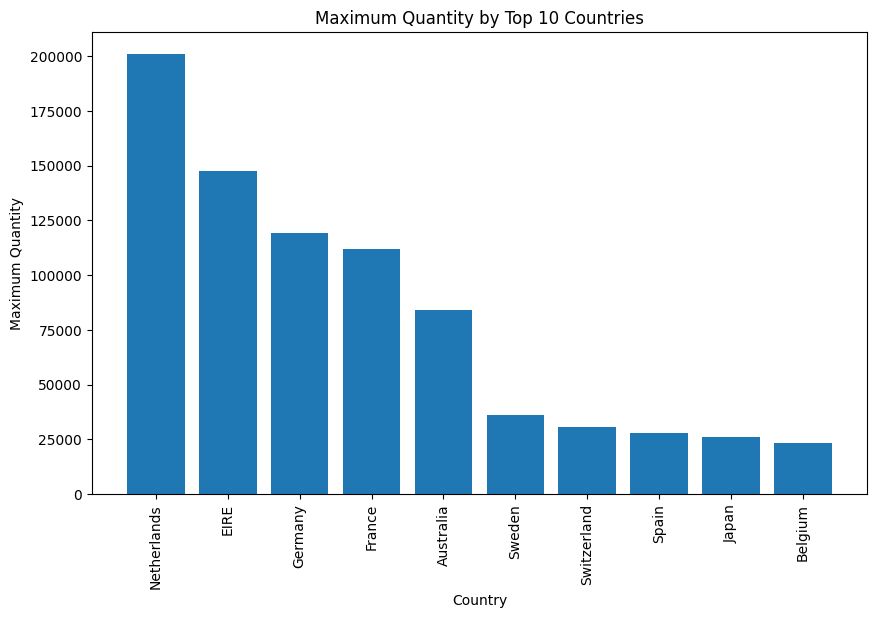

In [14]:
# Create a bar chart for this

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_dict.keys(), top_10_countries_dict.values())
plt.xlabel('Country')
plt.ylabel('Maximum Quantity')
plt.title('Maximum Quantity by Top 10 Countries')

plt.xticks(rotation=90)
plt.show()

In [50]:
#3) Find Total Sale between two dates entered. show a line chart for this
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)


date_df = df_cleaned[(df_cleaned['InvoiceDate'] >= start_date) & (df_cleaned['InvoiceDate'] <= end_date)]
total_sale = (date_df['UnitPrice'] * date_df['Quantity']).sum()

print("Total sale between ",start_date, "and",  end_date ," : ", total_sale)


Enter the start date (YYYY-MM-DD): 2001-01-01
Enter the end date (YYYY-MM-DD): 2012-01-01
Total sale between  2001-01-01 00:00:00 and 2012-01-01 00:00:00  :  10644560.424


<ipython-input-50-4735b107c6ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


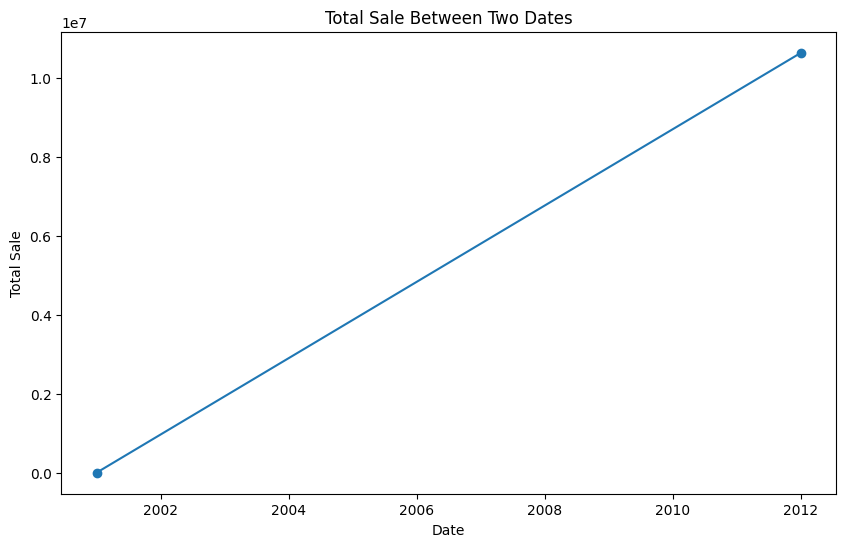

In [51]:
#show a line chart for this
plt.figure(figsize=(10, 6))
plt.plot([start_date, end_date], [0, total_sale], marker='o')
plt.title('Total Sale Between Two Dates')
plt.xlabel('Date')
plt.ylabel('Total Sale')
plt.show()


In [22]:
#4) Find each Countries Total SALE to find which Countries is highest potential customer do a bar chat for this

total_sales = (df_cleaned['UnitPrice'] * df_cleaned['Quantity']).groupby(df_cleaned['Country']).sum()
total_sales


Country
Australia                138521.310
Austria                   10198.680
Bahrain                     754.140
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     283453.960
European Community         1300.250
Finland                   22546.080
France                   209715.110
Germany                  228867.140
Greece                     4760.520
Hong Kong                 15691.800
Iceland                    4310.000
Israel                     8135.260
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal            

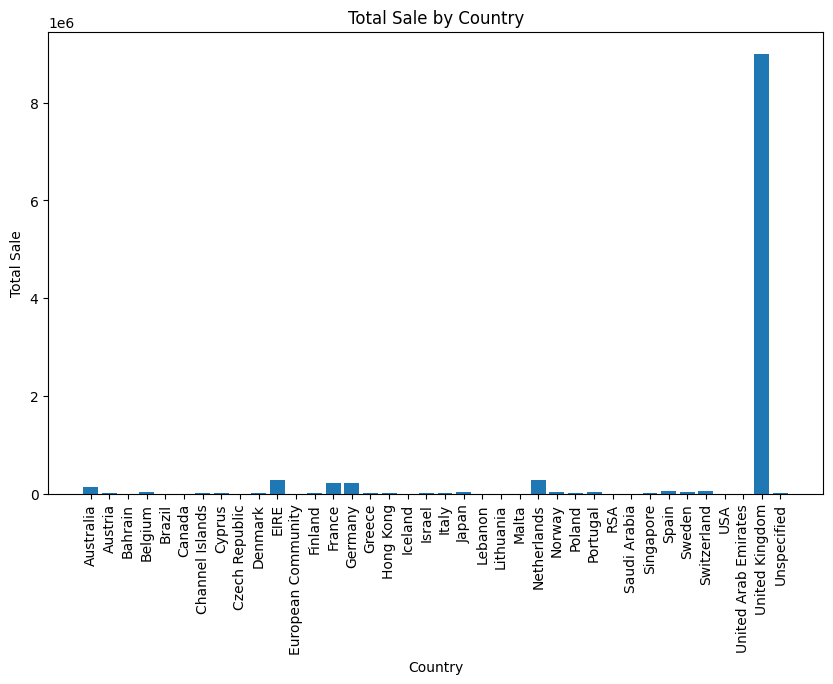

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(total_sales.index, total_sales)
plt.title('Total Sale by Country')
plt.xlabel('Country')
plt.ylabel('Total Sale')
plt.xticks(rotation=90)

plt.show()

In [48]:
#5) Which Customer Id has highest purchase in quantity and total and find out the country of it


cleaned_data = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

cleaned_data['Total'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']


high_pur_cust = cleaned_data.sort_values(by=['Quantity', 'Total'], ascending=False).iloc[0]

customer_id = high_pur_cust['CustomerID']
qty_pur = high_pur_cust['Quantity']
total_pur = high_pur_cust['Total']
cust_contry = high_pur_cust['Country']

print('Customer ID:', customer_id)
print('Quantity Purchased:', qty_pur)
print('Total Purchase:', total_pur)
print('Country:', cust_contry)


Customer ID: 16446.0
Quantity Purchased: 80995
Total Purchase: 168469.6
Country: United Kingdom


<ipython-input-48-990bac618786>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Total'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']


In [35]:
#6) Which Customer Id has lowest purchase in quantity and find out the country of it

cleaned_data = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

cleaned_data['Total'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']



low_pur_cust = cleaned_data.sort_values(by=['Quantity', 'Total'], ascending=True).iloc[0]

customer_id = low_pur_cust['CustomerID']
qty_pur = low_pur_cust['Quantity']
total_pur = low_pur_cust['Total']
cust_contry = low_pur_cust['Country']

print('Customer ID:', customer_id)
print('Quantity Purchased:', qty_pur)
print('Total Purchase:', total_pur)
print('Country:', cust_contry)


Customer ID: 13952.0
Quantity Purchased: 1
Total Purchase: 0.001
Country: United Kingdom


<ipython-input-35-e45719f905e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Total'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']


In [36]:
#7) Find the biggest order In Sale (Cost) which country was the order from and
# find total purchase (Cost) done by that customer ID

df_cleaned['TotalCost'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

max_order = df_cleaned[df_cleaned['TotalCost'] == df_cleaned['TotalCost'].max()]

country_of_max_order = max_order['Country'].values[0]

customer_id_of_max_order = max_order['CustomerID'].values[0]

total_purchase_cost = df_cleaned[df_cleaned['CustomerID'] == customer_id_of_max_order]['TotalCost'].sum()

total_purchase_cost

<ipython-input-36-a2465b3c48ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalCost'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


168472.5

In [45]:
#8) Find how many different customers are available for each country save the count in dictionary
# also return countries with highest and lowest customer count do bar chart for customer count.
#customer count on y axis and countries on x axis


customer_counts = df_cleaned.groupby('Country')['CustomerID'].nunique()
customer_count_dict = dict(customer_counts)

max_customer_country = customer_counts.idxmax()
max_customer_count = customer_counts.max()

min_customer_country = customer_counts.idxmin()
min_customer_count = customer_counts.min()

print(max_customer_country, ": " , max_customer_count )
print(min_customer_country, ": ",  min_customer_count)



United Kingdom :  3921
Hong Kong :  0


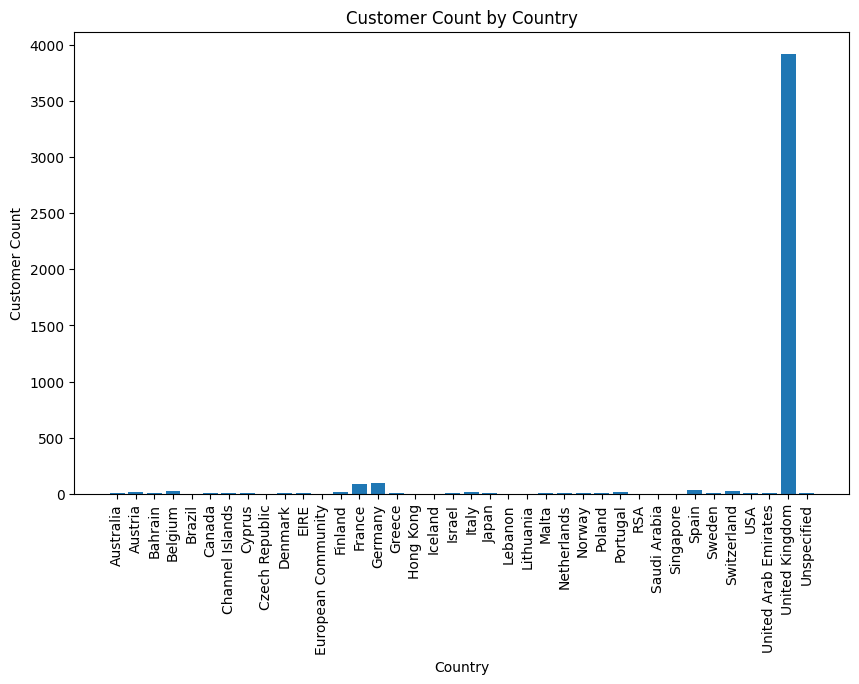

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(customer_counts.index, customer_counts.values)
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.title('Customer Count by Country')

plt.xticks(rotation=90)

plt.show()

In [77]:
#9) Find which stock code was ordered the most by each country
most_ordered = df_cleaned.groupby(['Country','StockCode']).sum()
most_ordered_by_country = most_ordered.loc[most_ordered.groupby('Country')['Quantity'].idxmax()]
most_ordered_by_country


<ipython-input-77-e801afee849c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered = df_cleaned.groupby(['Country','StockCode']).sum()


,,Quantity,UnitPrice,CustomerID,TotalCost
Country,StockCode,,,,
Australia,22492,2952,3.50,74506.0,1630.80
Austria,21918,288,0.36,12818.0,103.68
Bahrain,23076,96,1.25,12355.0,120.00
Belgium,21212,480,6.47,149713.0,248.40
Brazil,21430,24,3.39,12769.0,81.36
Canada,37370,504,1.06,17443.0,534.24
Channel Islands,21785,407,0.65,14935.0,264.55
Cyprus,22335,384,1.20,24825.0,220.80
Czech Republic,22578,72,0.29,12781.0,20.88
